# Exploratory Data Analysis

In [2]:
%matplotlib inline
import numpy as np
import requests
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
 
sns.set(color_codes = True)

In [12]:
city = pd.read_csv('./Data_Source/city.csv')
home = pd.read_csv('./Data_Source/home_ult.csv')
school = pd.read_csv('./Data_Source/school.csv')
fire = pd.read_csv('./Data_Source/fire.csv')
police = pd.read_csv('./Data_Source/police.csv')
crime_data = pd.read_csv('./Data_Source/crime_data.csv')
crime_police = pd.read_csv('./Data_Source/crime_police.csv')
crime_rate = pd.read_csv('./Data_Source/crime_rate.csv')
crime_police_ult = pd.read_csv('./Data_Source/crime_police_ult.csv')
Final = pd.read_csv('./Data_Source/Final.csv')
Final

,property_id,price,beds,baths,size(sqft),line,city,state,zipcode,longitude,...,S_zip,S_latitude,S_longitude,dist_S (mi.),F_zip,F_latitude,F_longitude,dist_F (mi.),crime_rate(%),POPDEN2010 (per sq. mi.)
0,M5001559427,410000,4,2,1440,104 Emily Dr,Manahawkin,NJ,8050,-74.242958,...,8050.0,39.702271,-74.256461,1.756368,8050.0,39.694973,-74.253075,1.222527,1.625024,485
1,M5003192128,749000,3,2,1812,152 Evelyn Dr,Manahawkin,NJ,8050,-74.240649,...,8050.0,39.702271,-74.256461,2.256102,8050.0,39.694973,-74.253075,1.720297,1.625024,485
2,M5018130177,484900,4,2,1786,1389 E Mallard Dr,Manahawkin,NJ,8050,-74.214566,...,8050.0,39.702271,-74.256461,3.034089,8050.0,39.694973,-74.253075,2.576884,1.625024,485
3,M5022367641,339000,3,2,1378,1062 Driftwood Ave,Manahawkin,NJ,8050,-74.275864,...,8050.0,39.741927,-74.280700,0.726137,8050.0,39.734573,-74.279594,0.264668,1.625024,485
4,M5024752662,395000,3,2,992,1219 Coast Ave,Manahawkin,NJ,8050,-74.286465,...,8050.0,39.741927,-74.280700,0.837592,8050.0,39.734573,-74.279594,0.461485,1.625024,485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,M6303112181,3399000,5,5,4966,14 E 29th St,Barnegat Light,NJ,8006,-74.114924,...,8758.0,39.788745,-74.201119,5.759499,8006.0,39.756428,-74.107544,1.162269,8.842730,254
2230,M6597277240,1499000,4,4,2462,38 W 8th St,Barnegat Light,NJ,8006,-74.109892,...,8758.0,39.788745,-74.201119,5.395256,8006.0,39.756428,-74.107544,0.202421,8.842730,254
2231,M6735381003,895000,3,3,1506,16 W 6th St,Barnegat Light,NJ,8006,-74.108170,...,8758.0,39.788745,-74.201119,5.449364,8006.0,39.756428,-74.107544,0.247408,8.842730,254
2232,M6921655107,1649000,4,3,2116,2202 Central Ave,Barnegat Light,NJ,8006,-74.112822,...,8758.0,39.788745,-74.201119,5.641933,8006.0,39.756428,-74.107544,0.757755,8.842730,254


## Horizontal Barchart for missing values

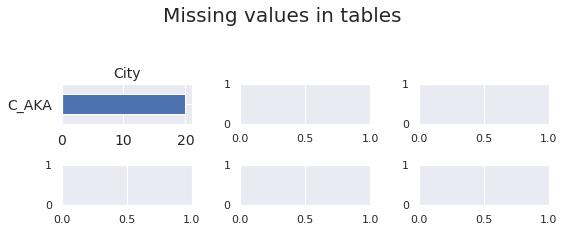

In [14]:
data_dict = {'City' : city.isna().sum(), 'Home' : home.isna().sum(), 'School' : school.isna().sum(), 
             'Fire' : fire.isna().sum(), 'Police' : police.isna().sum(), 'Crime Data' : crime_data.isna().sum()}

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (8,3))

[x, y] = [0, 0]
for name,data_null in data_dict.items():
    
    if data_null.sum() != 0:
        data_null[data_null != 0].plot(kind='barh', ax = ax[x][y], fontsize = 14).set_title(name, fontsize = 14)
        
        y += 1

fig.suptitle('Missing values in tables', fontsize = 20, ha = 'center', va = 'bottom')

plt.tight_layout()

In [5]:
city['C_zip'] = city['C_zip'].astype(str)
city.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,C_latitude,C_longitude,C_population
count,32.00,32.00,32.00
mean,39.91,-74.19,14766.88
std,0.15,0.11,15953.57
min,39.55,-74.53,0.00
25%,39.83,-74.22,2306.00
50%,39.94,-74.18,6815.50
75%,40.00,-74.11,21605.75
max,40.10,-74.04,55159.00


In [ ]:
city.info()

In [7]:
home['zipcode'] = home['zipcode'].astype(str)
home.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,price,beds,baths,size(sqft),longitude,latitude,days_ago
count,2234.00,2234.00,2234.00,2234.00,2234.00,2234.00,2234.00
mean,492955.72,3.36,2.56,2062.09,-74.21,39.93,39.18
std,517837.92,1.23,1.09,1106.21,0.09,0.15,45.58
min,18500.00,1.00,1.00,480.00,-74.55,39.54,0.00
25%,264900.00,2.00,2.00,1328.00,-74.27,39.84,14.00
50%,379900.00,3.00,2.00,1840.00,-74.21,39.96,25.00
75%,569900.00,4.00,3.00,2582.00,-74.15,40.05,50.00
max,9950000.00,14.00,14.00,24873.00,-74.03,40.17,723.00


In [ ]:
home.info()

In [7]:
school[['S_ID', 'S_zip']] = school[['S_ID', 'S_zip']].astype(str)
school.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,S_latitude,S_longitude
count,120.00,120.00
mean,39.94,-74.22
std,0.16,0.10
min,39.57,-74.53
25%,39.85,-74.27
50%,39.98,-74.20
75%,40.08,-74.16
max,40.15,-74.05


In [ ]:
school.info()

In [8]:
fire[['F_ID', 'F_zip']] = fire[['F_ID', 'F_zip']].astype(str)
fire.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,F_latitude,F_longitude
count,72.00,72.00
mean,39.97,-74.21
std,0.14,0.11
min,39.56,-74.53
25%,39.91,-74.27
50%,40.01,-74.20
75%,40.08,-74.14
max,40.16,-74.04


In [ ]:
fire.info()

In [9]:
police[['P_ID', 'P_zip']] = police[['P_ID', 'P_zip']].astype(str)
police.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,P_latitude,P_longitude
count,35.00,35.00
mean,39.88,-74.20
std,0.18,0.10
min,39.56,-74.52
25%,39.70,-74.24
50%,39.93,-74.20
75%,40.01,-74.14
max,40.11,-74.05


In [ ]:
police.info()

In [10]:
crime_data.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,aggravated-assault,arson,burglary,homicide,human-trafficing,larceny,motor-vehicle-theft,property-crime,rape,rape-legacy,robbery,violent-crime,case_number
count,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00
mean,46.77,4.34,159.14,0.83,0.00,773.86,25.11,958.11,9.14,0.00,18.11,74.86,1995.43
std,85.00,8.11,267.44,1.65,0.00,1394.60,46.69,1690.56,16.65,0.00,44.62,142.53,3505.66
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,0.00,14.50,0.00,0.00,91.50,2.50,102.00,0.00,0.00,0.00,4.00,207.00
50%,9.00,0.00,46.00,0.00,0.00,208.00,6.00,280.00,1.00,0.00,2.00,17.00,569.00
75%,55.00,3.50,145.00,1.00,0.00,798.00,22.00,941.00,8.00,0.00,13.00,86.00,2004.50
max,422.00,27.00,1049.00,8.00,0.00,6888.00,193.00,8096.00,77.00,0.00,239.00,711.00,16527.00


In [8]:
Final[['dist_P (mi.)', 'dist_S (mi.)', 'dist_F (mi.)']].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,dist_P (mi.),dist_S (mi.),dist_F (mi.)
count,2234.00,2234.00,2234.00
mean,2.50,1.34,1.23
std,1.53,1.09,0.95
min,0.03,0.05,0.03
25%,1.21,0.56,0.53
50%,2.30,1.04,0.99
75%,3.63,1.74,1.65
max,7.87,6.73,6.27


In [21]:
crime_police_ult[['P_ID', 'P_zip']] = crime_police_ult[['P_ID', 'P_zip']].astype(str)
crime_police_ult.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,crime_rate(%),POPDEN2010 (per sq. mi.),P_latitude,P_longitude
count,32.00,32.00,32.00,32.00
mean,3.66,1569.41,39.88,-74.20
std,3.55,1348.35,0.18,0.11
min,0.89,130.00,39.56,-74.52
25%,1.66,480.00,39.70,-74.24
50%,2.63,1054.50,39.93,-74.20
75%,3.67,2544.50,40.02,-74.14
max,18.12,4370.00,40.11,-74.05


In [20]:
crime_police_ult.nlargest(35,'crime_rate(%)')

,P_ID,P_name,P_address,P_city,ori,agency_name,mun_name,crime_rate(%),POPDEN2010 (per sq. mi.),P_zip,P_latitude,P_longitude
1,6221,BEACH HAVEN POLICE DEPARTMENT,300 ENGLESIDE AVENUE,BEACH HAVEN,NJ0150300,BEACH HAVEN POLICE DEPARTMENT,Beach Haven Borough,18.119658,502,8008,39.563049,-74.241287
23,14103,SEASIDE HEIGHTS POLICE DEPARTMENT,116 SHERMAN AVENUE,SEASIDE HEIGHTS,NJ0152600,SEASIDE HEIGHTS POLICE DEPARTMENT,Seaside Heights Borough,12.836855,3891,8751,39.943737,-74.073740
14,12488,HARVEY CEDARS POLICE DEPARTMENT,7606 LONG BEACH BOULEVARD,HARVEY CEDARS,NJ0150900,HARVEY CEDARS POLICE DEPARTMENT,Harvey Cedars Borough,8.842730,254,8008,39.705093,-74.135202
3,7382,MANTOLOKING POLICE DEPARTMENT,202 DOWNER AVENUE,MANTOLOKING,NJ0151900,MANTOLOKING POLICE DEPARTMENT,Mantoloking Borough,5.810811,465,8738,40.036987,-74.052316
24,19276,LONG BEACH TOWNSHIP POLICE DEPARTMENT,6805 LONG BEACH BOULEVARD,BRANT BEACH,NJ0151700,LONG BEACH TOWNSHIP POLICE DEPARTMENT,Long Beach Township,5.526057,130,8008,39.615893,-74.199483
28,19567,SHIP BOTTOM POLICE DEPARTMENT,1621 LONG BEACH BOULEVARD,SHIP BOTTOM,NJ0152800,SHIP BOTTOM POLICE DEPARTMENT,Ship Bottom Borough,3.979239,1179,8008,39.644869,-74.180041
30,21138,POINT PLEASANT BEACH POLICE DEPARTMENT,416 NEW JERSEY AVENUE,POINT PLEASANT BEACH,NJ0152500,POINT PLEASANT BEACH POLICE DEPARTMENT,Point Pleasant Beach Borough,3.884244,2496,8742,40.086954,-74.046908
29,19585,SEASIDE PARK BOROUGH POLICE DEPARTMENT,6TH AVENUE AND CENTRAL AVENUE,SEASIDE PARK,NJ0152700,SEASIDE PARK POLICE DEPARTMENT,Seaside Park Borough,3.825206,1456,8752,39.918731,-74.079088
26,19288,TOMS RIVER POLICE DEPARTMENT,255 OAK AVENUE,TOMS RIVER,NJ0150700,TOMS RIVER TOWNSHIP POLICE DEPARTMENT,Toms River Township,3.622793,1732,8753,39.987325,-74.184588
4,7389,BAY HEAD POLICE DEPARTMENT,81 BRIDGE AVENUE,BAY HEAD,NJ0150200,BAY HEAD POLICE DEPARTMENT,Bay Head Borough,3.512397,1299,8742,40.069550,-74.046565


In [15]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2234 entries, 0 to 2233
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   property_id               2234 non-null   object 
 1   price                     2234 non-null   int64  
 2   beds                      2234 non-null   int64  
 3   baths                     2234 non-null   int64  
 4   size(sqft)                2234 non-null   int64  
 5   line                      2234 non-null   object 
 6   city                      2234 non-null   object 
 7   state                     2234 non-null   object 
 8   zipcode                   2234 non-null   int64  
 9   longitude                 2234 non-null   float64
 10  latitude                  2234 non-null   float64
 11  days_ago                  2234 non-null   int64  
 12  features                  2234 non-null   object 
 13  P_zip                     2234 non-null   float64
 14  P_latitu

In [9]:
print(len(home.city.unique()))
home.city.value_counts().nlargest(40)

40


Toms River              442
Brick                   266
Jackson                 185
Barnegat                161
Lakewood                153
Manahawkin              145
Forked River            117
Tuckerton                96
Bayville                 94
Manchester               71
Whiting                  57
Waretown                 47
Seaside Heights          47
Lavallette               37
Lanoka Harbor            37
Beach Haven              36
Point Pleasant Beach     33
Mantoloking              32
Beachwood                31
Manchester Township      25
West Creek               24
Seaside Park             22
New Egypt                17
Barnegat Light           10
Island Heights            9
Pine Beach                9
Ocean Gate                9
Lakehurst                 7
Normandy Beach            3
Berkeley                  2
Stafford Township         1
Lacey                     1
Surf City                 1
Point Pleasant            1
Jackson Township          1
Cream Ridge         

In [18]:
Final.nlargest(50,'price')

,property_id,price,beds,baths,size(sqft),line,city,state,zipcode,longitude,...,S_zip,S_latitude,S_longitude,dist_S (mi.),F_zip,F_latitude,F_longitude,dist_F (mi.),crime_rate(%),POPDEN2010 (per sq. mi.)
184,M6731800872,9950000,8,9,7200,1417 Ocean Ave,Mantoloking,NJ,8738,-74.050874,...,8742.0,40.068021,-74.062886,2.528376,8738.0,40.037197,-74.051582,0.317348,5.810811,465
171,M5495064600,9250000,7,8,7700,1211 Ocean Ave,Mantoloking,NJ,8738,-74.049089,...,8742.0,40.069612,-74.050182,2.128617,8738.0,40.037197,-74.051582,0.174308,5.810811,465
2002,M5334622826,6500000,8,8,7219,91 Pershing Blvd,Lavallette,NJ,8735,-74.083205,...,8735.0,39.968689,-74.070416,0.729989,8735.0,39.969433,-74.072299,0.651356,3.125333,1791
2085,M9479483724,5700000,7,8,4480,1324 Ocean Front,Point Pleasant Beach,NJ,8742,-74.039428,...,8742.0,40.089084,-74.052666,0.819217,8742.0,40.086819,-74.046852,0.465734,3.884244,2496
196,M9886104467,4500000,6,5,4430,14 Cummins St,Mantoloking,NJ,8738,-74.057772,...,8735.0,39.968689,-74.070416,2.729036,8738.0,40.015793,-74.057297,0.610432,5.810811,465
165,M5001666334,4299999,4,5,4222,1050 Barnegat Ln,Mantoloking,NJ,8738,-74.049687,...,8742.0,40.069612,-74.050182,1.523856,8738.0,40.037197,-74.051582,0.720514,5.810811,465
177,M5870299931,4299000,5,5,4260,13 Edgewater Ter,Mantoloking,NJ,8738,-74.056076,...,8735.0,39.968689,-74.070416,3.185193,8738.0,40.015793,-74.057297,0.175816,5.810811,465
2013,M5912731318,4250000,6,6,6027,33 Pershing Blvd,Lavallette,NJ,8735,-74.078984,...,8735.0,39.968689,-74.070416,0.471924,8735.0,39.969433,-74.072299,0.382148,3.125333,1791
2014,M5980386857,3995000,6,5,3325,3574 Ocean Ter,Lavallette,NJ,8735,-74.060337,...,8735.0,39.968689,-74.070416,2.033600,8735.0,39.988010,-74.063583,0.649247,3.125333,1791
181,M6417221201,3850000,6,7,4302,297 Dutchmans Point Rd,Mantoloking,NJ,8738,-74.064068,...,8735.0,39.968689,-74.070416,3.138883,8738.0,40.015793,-74.057297,0.392056,5.810811,465


## Boxplot - price

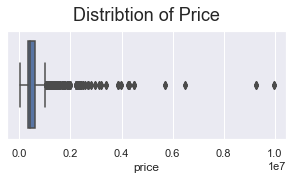

In [11]:
fig, ax = plt.subplots(figsize = (5,2))
sns.boxplot(x = home['price']).set_title('Distribtion of Price', fontsize = 18, ha = 'center', va = 'bottom')
plt.show()

## Histogram - features

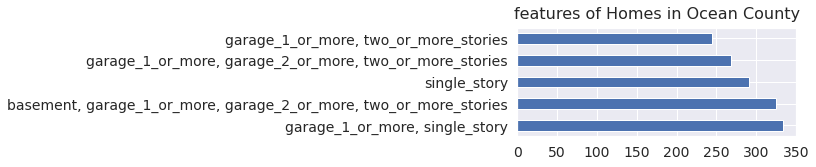

In [11]:
home.features.value_counts().nlargest(5).plot(kind = 'barh', fontsize = 14, 
                                            figsize = (5,2)).set_title('features of Homes in Ocean County',
                                                                      fontsize = 16, ha = 'center', va = 'bottom')

plt.show()

## Scatter plot - Price, size, beds, and baths

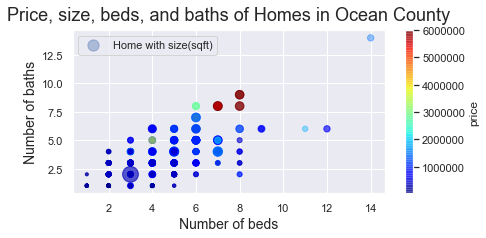

In [14]:
fig, ax = plt.subplots(figsize = (7,3))

home.plot(ax = ax, kind = "scatter", x = "beds", y = "baths", 
          s = home['size(sqft)']/100, label = "Home with size(sqft)",
          c = "price", cmap = plt.get_cmap("jet"), vmax = 6000000,
          colorbar = True, alpha = 0.4).set_title('Price, size, beds, and baths of Homes in Ocean County', 
                                                  fontsize = 18, ha = 'center', va = 'bottom')

ax.set_xlabel('Number of beds', fontsize = 14)
ax.set_ylabel('Number of baths', fontsize = 14)

plt.show()

In [4]:
MB_nj = gpd.read_file('./Maps/map_02/Municipal_Boundaries_of_NJ.shp')

ocean_county = MB_nj[MB_nj['COUNTY'] == 'OCEAN']
ocean_county = ocean_county.to_crs(epsg = 4326)

In [18]:
ocean = gpd.read_file('./Maps/map_01/OceanCountyParcels.shp')
ocean = ocean.to_crs(epsg = 4326)

## Map: Homes, Police Stations, and Crime Rate in Ocean County

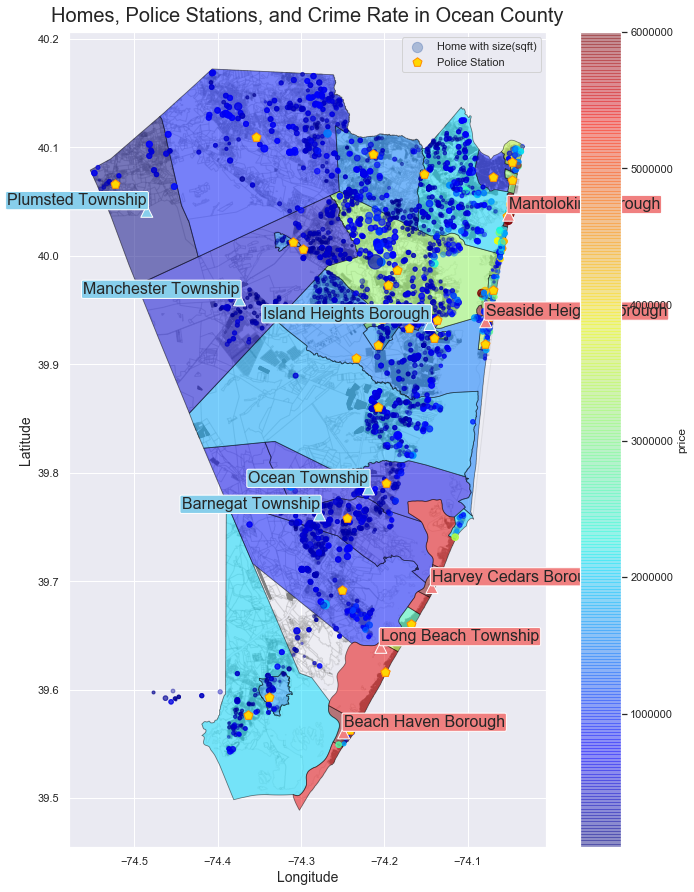

In [81]:
fig, ax = plt.subplots(figsize = (12,15))
ax.set_aspect('equal')

ocean.plot(ax = ax, color = 'white', 
           edgecolor = 'grey', alpha = 0.15).set_title('Homes, Police Stations, and Crime Rate in Ocean County',
                                                       fontsize = 20, ha = 'center', va = 'bottom')

crime_rate.plot(ax = ax, column = 'crime_rate(%)', cmap ='jet', vmax = 6, 
                linewidth = 0.8, edgecolor = 'black', alpha = 0.5)

home.plot(ax = ax, kind = "scatter", x = "longitude", y = "latitude", 
          s = home['size(sqft)']/120, label = "Home with size(sqft)",
          c = "price", cmap = plt.get_cmap("jet"), vmax = 6000000,
          colorbar = True, alpha = 0.4)

crime_police.plot(ax = ax, kind = "scatter", x = "P_longitude", y = "P_latitude",
                  s = 90, label = "Police Station",
                  color = 'gold', edgecolors = 'darkorange',
                  marker = 'p')

crime_rate.nsmallest(5,'crime_rate(%)').apply(lambda x: ax.annotate(s = x.NAME,
                                                                    xy = x.geometry.centroid.coords[0],
                                                                    ha = 'right', fontsize = 16,
                                                                    arrowprops = dict(facecolor = 'skyblue', shrink = 0.05),
                                                                    bbox = dict(boxstyle = "round,pad=0.1", fc = "skyblue"))
                                              ,axis = 1)

crime_rate.nlargest(5,'crime_rate(%)').apply(lambda x: ax.annotate(s = x.NAME,
                                                                   xy = x.geometry.centroid.coords[0],
                                                                   ha = 'left', fontsize = 16,
                                                                   arrowprops = dict(facecolor = 'lightcoral', shrink = 0.05),
                                                                   bbox = dict(boxstyle = "round,pad=0.1", fc = "lightcoral"))
                                             ,axis = 1)

ax.set_xlabel('Longitude', fontsize = 14)
ax.set_ylabel('Latitude', fontsize = 14)

plt.show()

## Map: Homes, Schools, and Fire Stations in Ocean County

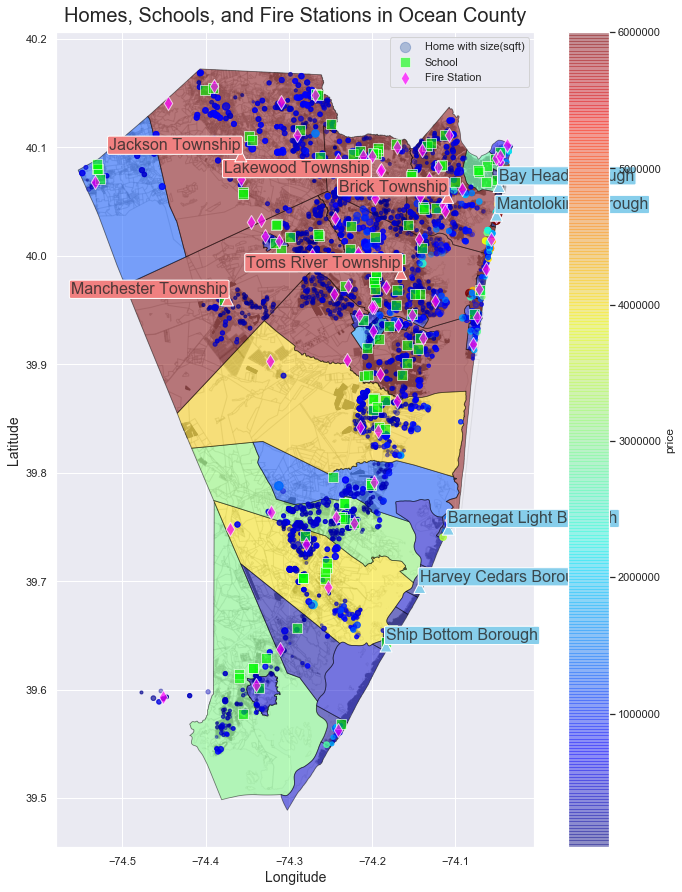

In [26]:
fig, ax = plt.subplots(figsize = (12,15))
ax.set_aspect('equal')

ocean.plot(ax = ax, color = 'white', 
           edgecolor = 'grey', alpha = 0.15).set_title('Homes, Schools, and Fire Stations in Ocean County',
                                                       fontsize = 20, ha = 'center', va = 'bottom')

crime_rate.plot(ax = ax, column = 'POP2010', cmap ='jet', vmax = 40000, 
                linewidth = 0.8, edgecolor = 'black', alpha = 0.5)

home.plot(ax = ax, kind = "scatter", x = "longitude", y = "latitude", 
          s = home['size(sqft)']/120, label = "Home with size(sqft)",
          c = "price", cmap = plt.get_cmap("jet"), vmax = 6000000,
          colorbar = True, alpha = 0.4)

school.plot(ax = ax, kind = "scatter", x = "S_longitude", y = "S_latitude",
            s = 90, label = "School",
            color = 'lime', edgecolors = 'white', alpha = 0.6,
            marker = 's')

fire.plot(ax = ax, kind = "scatter", x = "F_longitude", y = "F_latitude",
          s = 100, label = "Fire Station",
          color = 'magenta', edgecolors = 'white', alpha = 0.7,
          marker = 'd')

crime_rate.nsmallest(5,'POP2010').apply(lambda x: ax.annotate(s = x.NAME,
                                                              xy = x.geometry.centroid.coords[0],
                                                              ha = 'left', fontsize = 16, alpha = 0.8,
                                                              arrowprops = dict(facecolor = 'skyblue', shrink = 0.05),
                                                              bbox = dict(boxstyle = "round,pad=0.1", fc = "skyblue"))
                                        ,axis = 1)

crime_rate.nlargest(5,'POP2010').apply(lambda x: ax.annotate(s = x.NAME,
                                                             xy = x.geometry.centroid.coords[0],
                                                             ha = 'right', fontsize = 16, alpha = 0.8,
                                                             arrowprops = dict(facecolor = 'lightcoral', shrink = 0.05),
                                                             bbox = dict(boxstyle = "round,pad=0.1", fc = "lightcoral"))
                                       ,axis = 1)

ax.set_xlabel('Longitude', fontsize = 14)
ax.set_ylabel('Latitude', fontsize = 14)

plt.show()